# **Solving regression problem of concrete strength.**

This notebook will look into to values of R2, MSE and RMSE.

---

## **R2**

> The R² metric, also known as the R-two or coefficient of determination, represents the percentage of data variance that is explained by the model. The results vary from 0 to 1, they are usually also expressed in percentage terms, that is, varying between 0% and 100%. The higher the R² value, the more explanatory the model is in relation to the predicted data. Equation 2 shows the calculation of this metric, in which y and ŷ are the actual and predicted values, respectively, and the y-bar represents the average of the actual values.

![R2](https://vitalflux.com/wp-content/uploads/2019/07/R-squared-formula-function-of-SSE-and-SST.jpg)

---

## **MSE**

> The Mean Squared Error (MSE) is a metric that averages the difference between the predicted and actual value, like the MAE metric. However, instead of using the modulus of the result between the value of y and ŷ, in this metric the difference is squared. In this way, penalizing values ​​that are very different between the forecast and the actual. Therefore, the higher the MSE value is, it means that the model did not perform well in relation to the predictions.

![MSE](https://miro.medium.com/max/808/1*-e1QGatrODWpJkEwqP4Jyg.png)

---

## **RMSE**
> The root mean squared error is basically the same MSE calculation, still containing the same idea of penalizing large differences between the predicted and actual value. However, to deal with the problem of the difference between units, the square root is applied as shown in equation 6. Thus, the unit is on the same scale as the original data, resulting in a better interpretability of the metric result.

![RMSE](https://miro.medium.com/max/548/0*IN6VnDGeafpUioDN)

# **About Dataset**

Concrete is the most important material in civil engineering. The
concrete compressive strength is a highly nonlinear function of age and
ingredients. These ingredients include cement, blast furnace slag, fly ash,
water, superplasticizer, coarse aggregate, and fine aggregate.

## **Content**

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).

### Summary Statistics:

* Number of instances (observations): 1030<BR>
* Number of Attributes: 9<BR>
* Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable<BR>
* Missing Attribute Values: None<BR>

### Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description.
The concrete compressive strength is the regression problem. The order of this listing
corresponds to the order of numerals along the rows of the database.

*Name -> Data Type -> Measurement*

**1.** Cement (component 1) -> quantitative -> kg in a m3 mixture<BR>
**2.** Blast Furnace Slag (component 2) -> quantitative -> kg in a m3 mixture<BR>
**3.** Fly Ash (component 3) -> quantitative -> kg in a m3 mixture<BR>
**4.** Water (component 4) -> quantitative -> kg in a m3 mixture<BR>
**5.** Superplasticizer (component 5) -> quantitative -> kg in a m3 mixture<BR>
**6.** Coarse Aggregate (component 6) -> quantitative -> kg in a m3 mixture<BR>
**7.** Fine Aggregate (component 7) -> quantitative -> kg in a m3 mixture<BR>
**8.** Age -- quantitative -> Day (1~365)<BR>
**9.** Concrete compressive strength -> quantitative -> MPa **(predit this variable)**<BR>

# **1. Exploratory Data Analysis (EDA)**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/concrete-compressive-strength/Concrete Compressive Strength.csv


In [2]:
#import datas
df_data_concrete = pd.read_csv('/kaggle/input/concrete-compressive-strength/Concrete Compressive Strength.csv')
df_data_concrete.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [3]:
df_data_concrete.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
# Rename columns
df_data_concrete = df_data_concrete.rename(
    columns={
        'Cement (component 1)(kg in a m^3 mixture)':'Cement',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnace_Slag',
        'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
        'Water  (component 4)(kg in a m^3 mixture)':'Water',
        'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
        'Age (day)':'Age',
        "Concrete compressive strength(MPa, megapascals) ": "Concrete_compressive_strength"
    }
)

In [5]:
df_data_concrete.describe().T

count        mean         std         min  \
Cement                         1030.0  281.165631  104.507142  102.000000   
Blast_Furnace_Slag             1030.0   73.895485   86.279104    0.000000   
Fly_Ash                        1030.0   54.187136   63.996469    0.000000   
Water                          1030.0  181.566359   21.355567  121.750000   
Superplasticizer               1030.0    6.203112    5.973492    0.000000   
Coarse_Aggregate               1030.0  972.918592   77.753818  801.000000   
Fine_Aggregate                 1030.0  773.578883   80.175427  594.000000   
Age                            1030.0   45.662136   63.169912    1.000000   
Concrete_compressive_strength  1030.0   35.817836   16.705679    2.331808   

                                      25%         50%          75%  \
Cement                         192.375000  272.900000   350.000000   
Blast_Furnace_Slag               0.000000   22.000000   142.950000   
Fly_Ash                          0.000000    0.000000   118.270000   
Water                          164.900000  185.000000   192.000000   
Superplasticizer                 0.000000    6.350000    10.160000   
Coarse_Aggregate               932.000000  968.000000  1029.400000   
Fine_Aggregate                 730.950000  779.510000   824.000000   
Age                              7.000000   28.000000    56.000000   
Concrete_compressive_strength   23.707115   34.442774    46.136287   

                                       max  
Cement                          540.000000  
Blast_Furnace_Slag              359.400000  
Fly_Ash                         200.100000  
Water                           247.000000  
Superplasticizer                 32.200000  
Coarse_Aggregate               1145.000000  
Fine_Aggregate                  992.600000  
Age                             365.000000  
Concrete_compressive_strength    82.599225

In [6]:
df_data_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


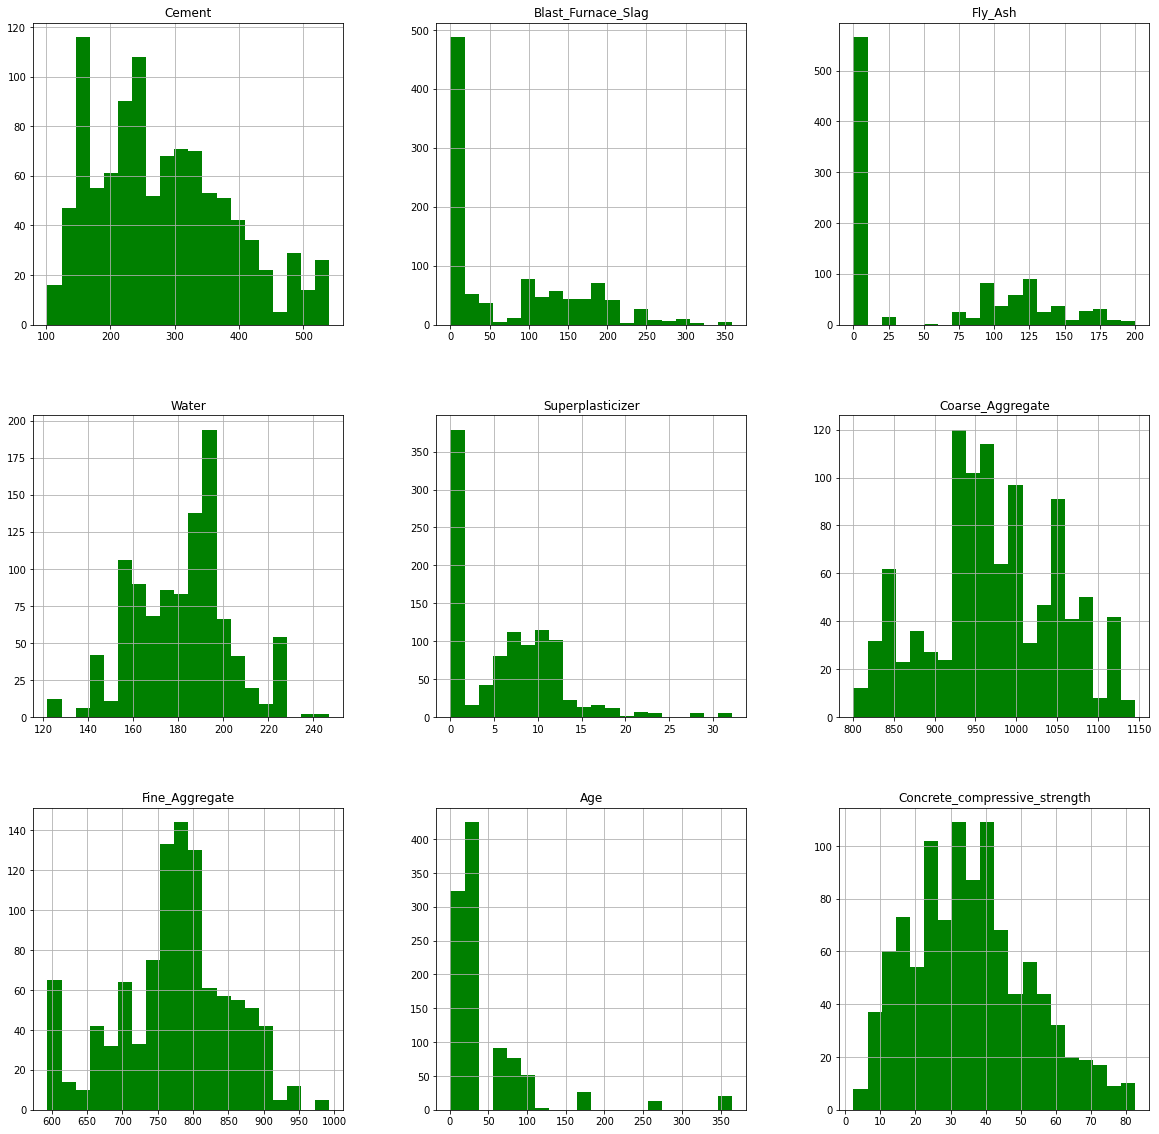

In [7]:
df_data_concrete.hist(bins = 20, figsize = (20,20), color = 'g');

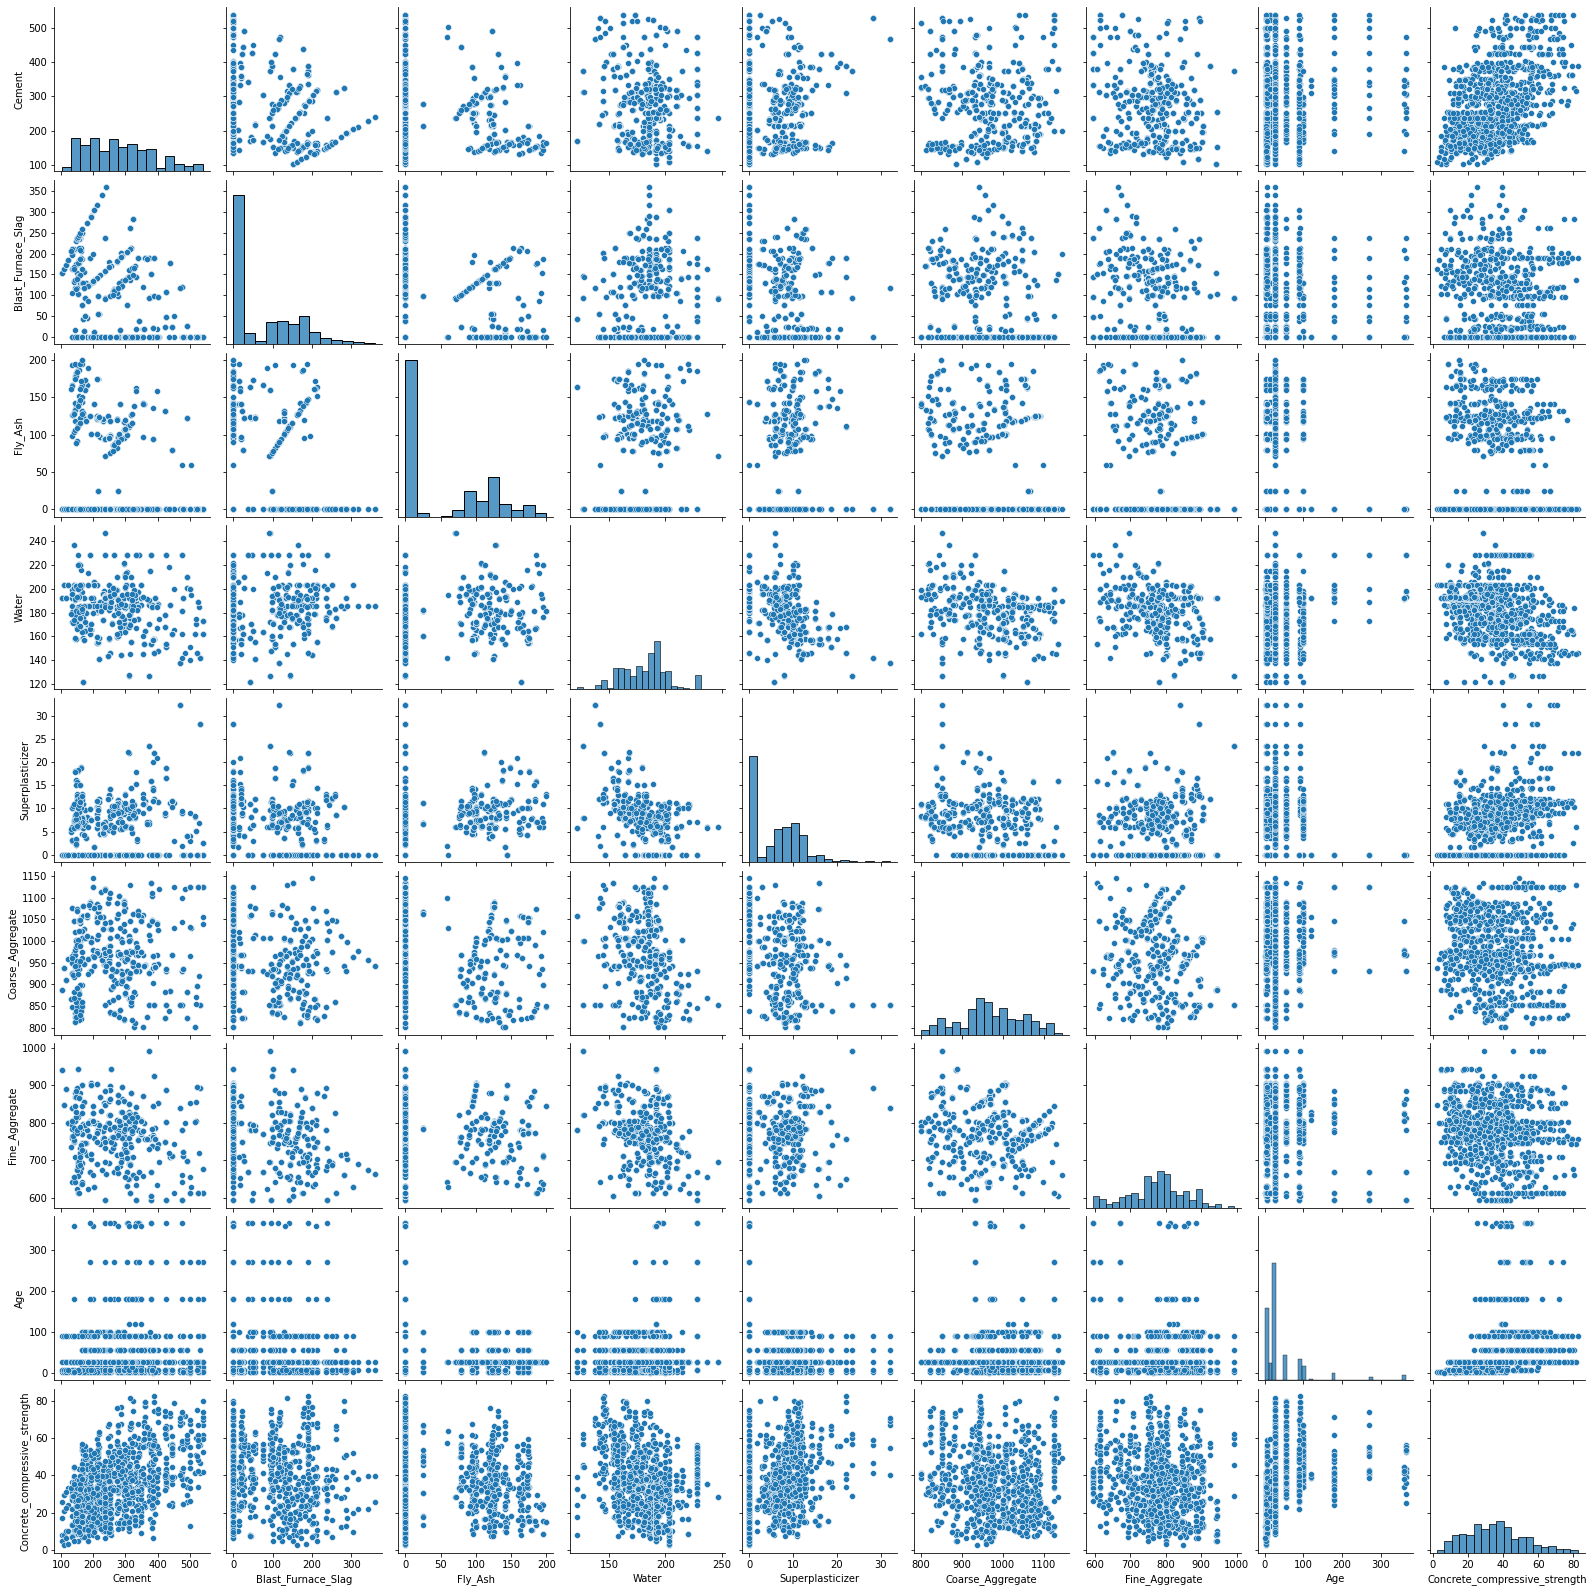

In [8]:
sns.pairplot(df_data_concrete);

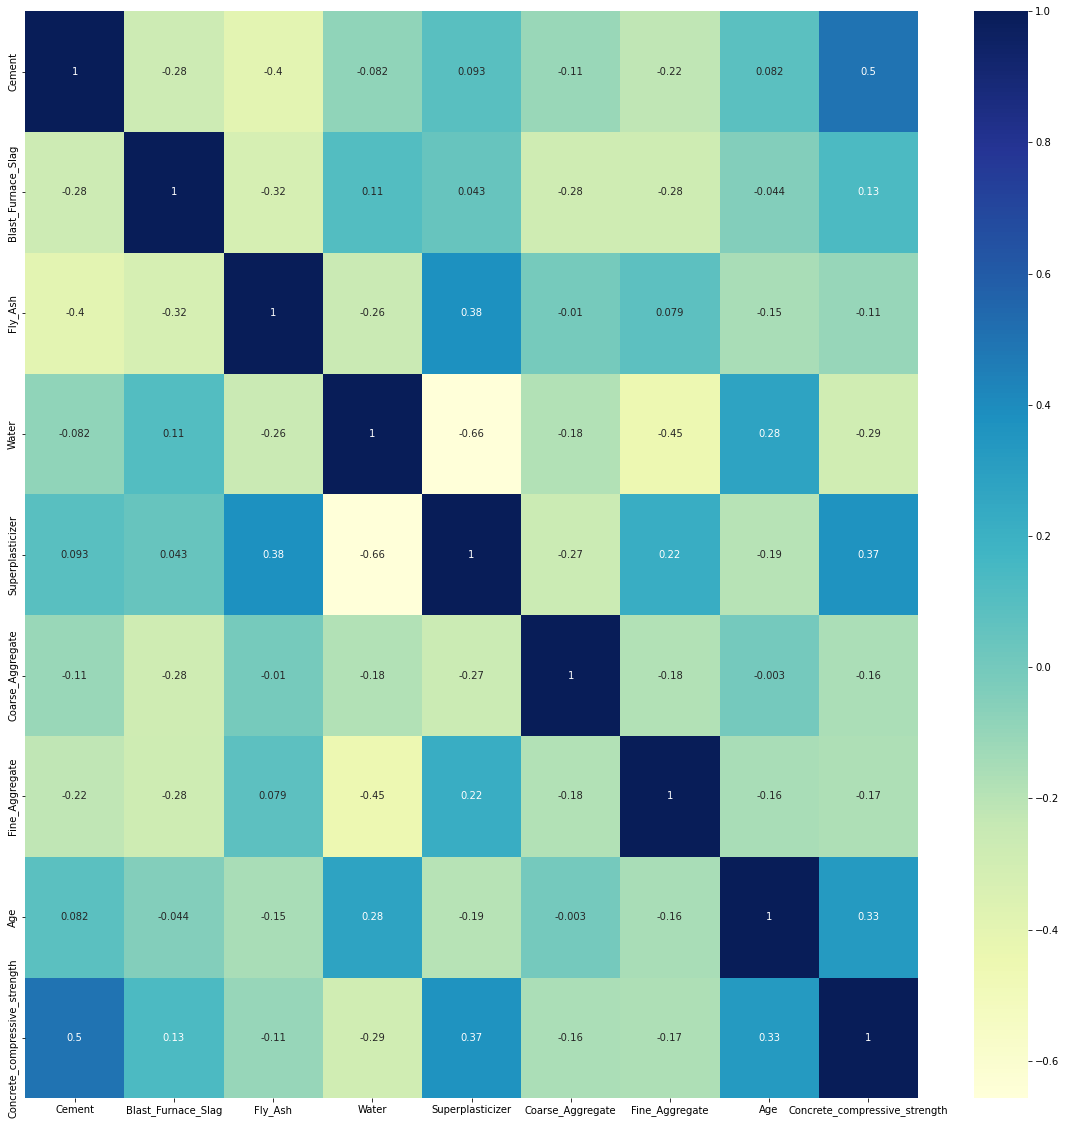

In [9]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(df_data_concrete.corr(), annot = True, cmap="YlGnBu");

In [10]:
# descritivo dos dados
from pandas_profiling import ProfileReport
    
profile = ProfileReport(df_data_concrete, title="Data concrete compressive strength")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **2. Prepare data**

In [11]:
# Drop datas duplicateds
df_cleaned = df_data_concrete.drop_duplicates()

<AxesSubplot:>

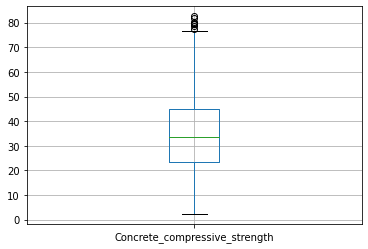

In [12]:
#visualization outliers of Concrete_compressive_strength
df_cleaned[['Concrete_compressive_strength']].boxplot()

In [13]:
# Remove possible outliers in Concrete_compressive_strength
df_cleaned = df_cleaned[df_cleaned['Concrete_compressive_strength'] < 76] 

In [14]:
# View shape datas cleaneds
df_cleaned.shape

(995, 9)

In [15]:
# division train/test
# obs: used a low amount of test samples as the dataset does not contain much data
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop('Concrete_compressive_strength', axis = 1), 
                                                    df_cleaned['Concrete_compressive_strength'],
                                                    test_size = 0.01,
                                                    random_state = 42)

In [16]:
# noramization with between 0 and 1
normaliza = StandardScaler()

X_std_train = normaliza.fit_transform(X_train)
X_std_test = normaliza.fit_transform(X_test)

In [17]:
# Show shape of train and test
display(X_train.shape)
display(X_test.shape)

(985, 8)

(10, 8)

# **3. Construct model to predict**

In [18]:

# Set the parameters for model
param = {'max_depth': 9, 
         'subsample': 0.99,
         'min_child_weight': 1,
         'eta':0.33, 
         'seed':1,
         'verbosity': 1,
         'eval_metric':'rmse'}

#DMatrix is an optimized data structure that provides better memory efficiency and training speed.

# Create DMatrix to train the model
xgbtrain = xgb.DMatrix(X_train, y_train)

watchlist  = [(xgbtrain,'train-rmse')]

# Train the model
bst = xgb.train(param, xgbtrain)

#Predict test
preds = bst.predict(xgb.DMatrix(X_test))

# **4. Calculation values of R2, MSE and RMSE**

In [19]:
#value of R2, MSE and RMSE
r2 = r2_score(preds, y_test)
mse = mean_squared_error(preds, y_test)
rmse = np.sqrt(mse)


# Print the R2, MSE and RMSE of the model
print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

R2: 0.8471842208615219
MSE: 16.828127485522735
RMSE: 4.102210073304723
